<a href="https://colab.research.google.com/github/shotokillua/cv/blob/main/day-99-Portfolio-Project-Analyze-Deaths-Involving-Police-in-the-United-States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.shape

(29322, 3)

In [ ]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [ ]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [ ]:
df_hh_income.duplicated().any()

False

**df_hh_income dataframe has 29322 rows and 3 columns.
Column names are: 'Geographic Area', 'City', 'Median Income'.
There are NaN values but no duplicate values.**

In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [ ]:
df_pct_poverty.duplicated().any()

False

**df_pct_poverty dataframe has 29329 rows and 3 columns.
Column names are: 'Geographic Area', 'City', 'poverty_rate'.
There are no NaN values and no duplicate values.**

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
df_pct_completed_hs.isna().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [ ]:
df_pct_completed_hs.duplicated().any()

False

**df_pct_completed_hs dataframe has 29329 rows and 3 columns.
Column names are: 'Geographic Area', 'City', 'percent_complete_hs'.
There are no NaN values and no duplicate values.**

In [ ]:
df_share_race_city.shape

(29268, 7)

In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
df_share_race_city.isna().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [ ]:
df_share_race_city.duplicated().any()

False

**df_share_race_city dataframe has 29268 rows and 7 columns.
Column names are: 'Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'.
There are no NaN values and no duplicate values.**

In [ ]:
df_fatalities.shape

(2535, 14)

In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [ ]:
df_fatalities.duplicated().any()

False

**df_fatalities dataframe has 2535 rows and 14 columns.
Column names are: 'id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'.
There are NaN values but no duplicate values.**

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income = df_hh_income.fillna(0) # df_hh_income no longer has NaN values

In [ ]:
df_hh_income.isna().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [ ]:
df_fatalities = df_fatalities.fillna(0) # df_fatalities no longer has NaN values

In [ ]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [ ]:
df_pct_poverty['poverty_rate'].replace('-', 0, regex=True, inplace=True)
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].astype(float)

In [ ]:
state_poverty_rates = df_pct_poverty.groupby(['Geographic Area'])['poverty_rate'].mean() # using the average will show us which state has the highest and lowest poverty rate.

In [ ]:
state_poverty_rates = state_poverty_rates.sort_values(ascending=True)

In [ ]:
state_poverty_rates

Geographic Area
NJ    8.16
WY    9.06
CT    9.14
MA    9.55
MD   10.27
RI   10.37
NY   11.64
UT   11.72
ND   12.13
IA   12.23
NV   12.37
PA   12.49
DE   12.56
NH   12.66
WI   12.86
NE   12.92
CO   13.19
HI   13.40
MN   13.75
VT   13.79
IL   13.85
VA   14.59
KS   14.72
WA   14.83
OH   14.83
IN   15.50
SD   15.75
MT   16.42
OR   16.44
CA   16.89
ME   16.89
FL   17.51
MI   17.90
DC   18.00
ID   18.08
AK   18.68
TX   19.50
NC   19.72
TN   19.89
MO   19.93
KY   20.08
OK   20.55
AL   20.61
WV   21.08
SC   22.11
LA   22.29
NM   22.51
AR   22.96
GA   23.66
AZ   25.27
MS   26.88
Name: poverty_rate, dtype: float64

In [ ]:
state_poverty_bar = px.bar(state_poverty_rates,
                             x=state_poverty_rates.index,
                             y=state_poverty_rates.values,
                             color=state_poverty_rates.index,
                             title='Poverty Rates by State')

state_poverty_bar.update_layout(yaxis_title='Poverty Rate (%)',
                                xaxis_title='State')

state_poverty_bar.show()

**Missouri has the highest poverty rate, while New Jersey have the lowest poverty rate in the US.**

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [ ]:
df_pct_completed_hs['percent_completed_hs'].replace('-', 0, regex=True, inplace=True)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

In [ ]:
state_graduation_rates = df_pct_completed_hs.groupby(['Geographic Area'])['percent_completed_hs'].mean()

In [ ]:
state_graduation_rates = state_graduation_rates.sort_values(ascending=True)

In [ ]:
state_graduation_rates

Geographic Area
TX   74.09
MS   78.47
GA   78.63
NM   78.97
LA   79.12
AZ   79.22
AR   79.95
AK   80.10
AL   80.16
SC   80.65
CA   80.82
TN   81.63
WV   82.14
KY   82.22
OK   82.46
MO   82.79
NC   83.14
WY   83.97
ID   84.42
VA   84.88
FL   85.46
SD   86.18
IN   86.32
NV   87.05
WA   87.07
ND   87.60
OR   87.60
KS   87.97
MD   88.08
OH   88.20
IL   88.29
DE   88.52
RI   88.82
CO   88.93
PA   88.97
MI   89.21
DC   89.30
MN   89.47
NE   89.52
UT   89.64
IA   89.67
VT   89.98
MT   89.99
WI   90.26
NJ   90.52
NY   90.54
NH   90.71
ME   91.43
CT   91.59
HI   91.67
MA   92.03
Name: percent_completed_hs, dtype: float64

In [ ]:
grad_rates_bar = px.bar(state_graduation_rates,
                        x=state_graduation_rates.index,
                        y=state_graduation_rates.values,
                        color=state_graduation_rates.index,
                        title='High School Graduation Rates by State')
grad_rates_bar.show()

**Texas is the state with the lowest HS graduation rate, while Maine has the highest HS graduation rate.**

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
merged_df = pd.merge(state_poverty_rates,
                     state_graduation_rates,
                     on='Geographic Area')

In [ ]:
merged_df

,poverty_rate,percent_completed_hs
Geographic Area,,
NJ,8.16,90.52
WY,9.06,83.97
CT,9.14,91.59
MA,9.55,92.03
MD,10.27,88.08
RI,10.37,88.82
NY,11.64,90.54
UT,11.72,89.64
ND,12.13,87.60


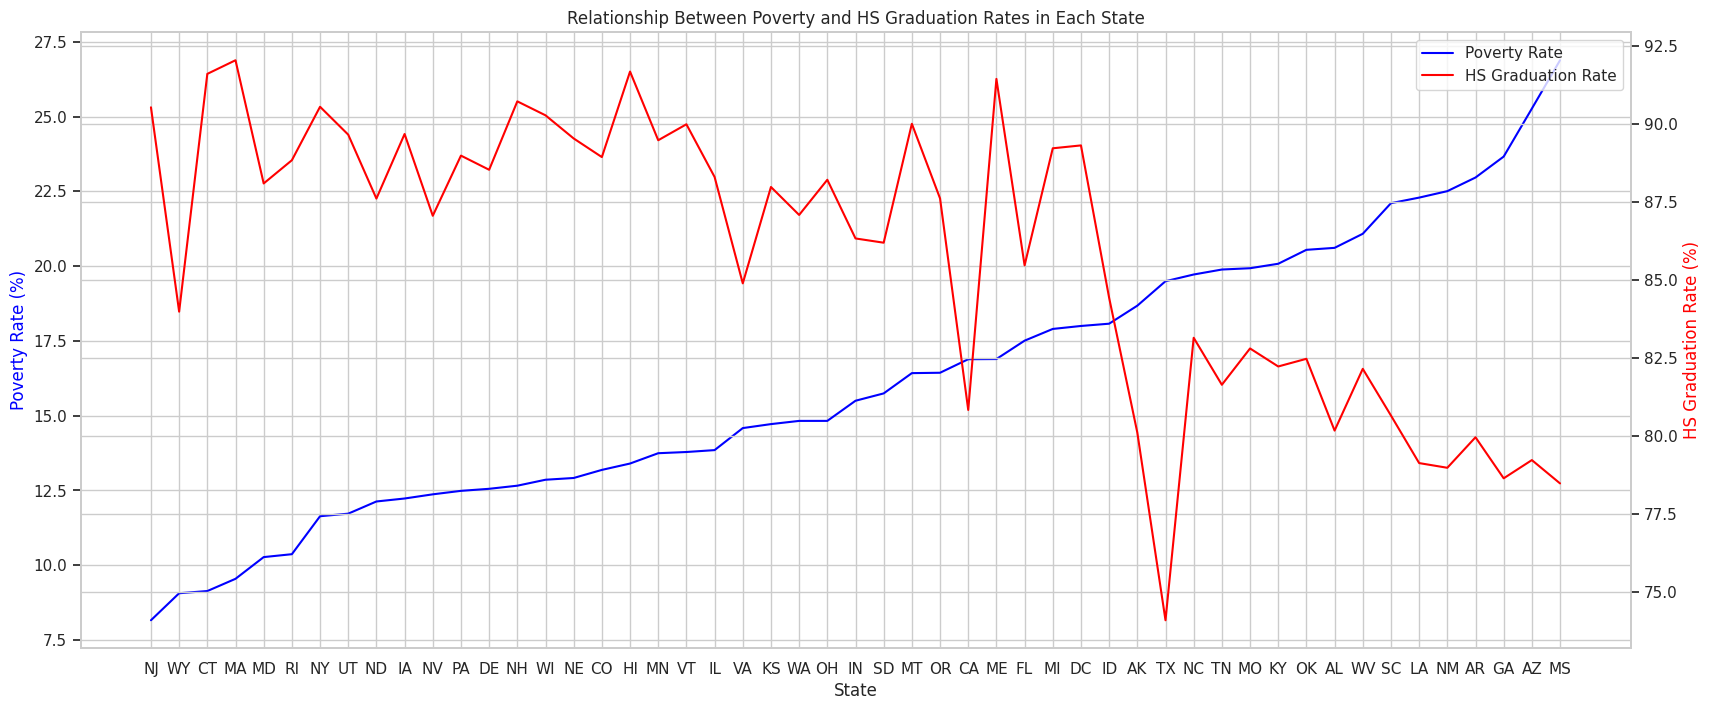

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot the first y-axis data
ax1.plot(merged_df.index, merged_df['poverty_rate'], color='blue', label='Poverty Rate')
ax1.set_ylabel('Poverty Rate (%)', color='blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second y-axis data
ax2.plot(merged_df.index, merged_df['percent_completed_hs'], color='red', label='HS Graduation Rate')
ax2.set_ylabel('HS Graduation Rate (%)', color='red')

# Set x-axis label and title
ax1.set_xlabel('State')
ax1.set_title('Relationship Between Poverty and HS Graduation Rates in Each State')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Display the plot
plt.show()

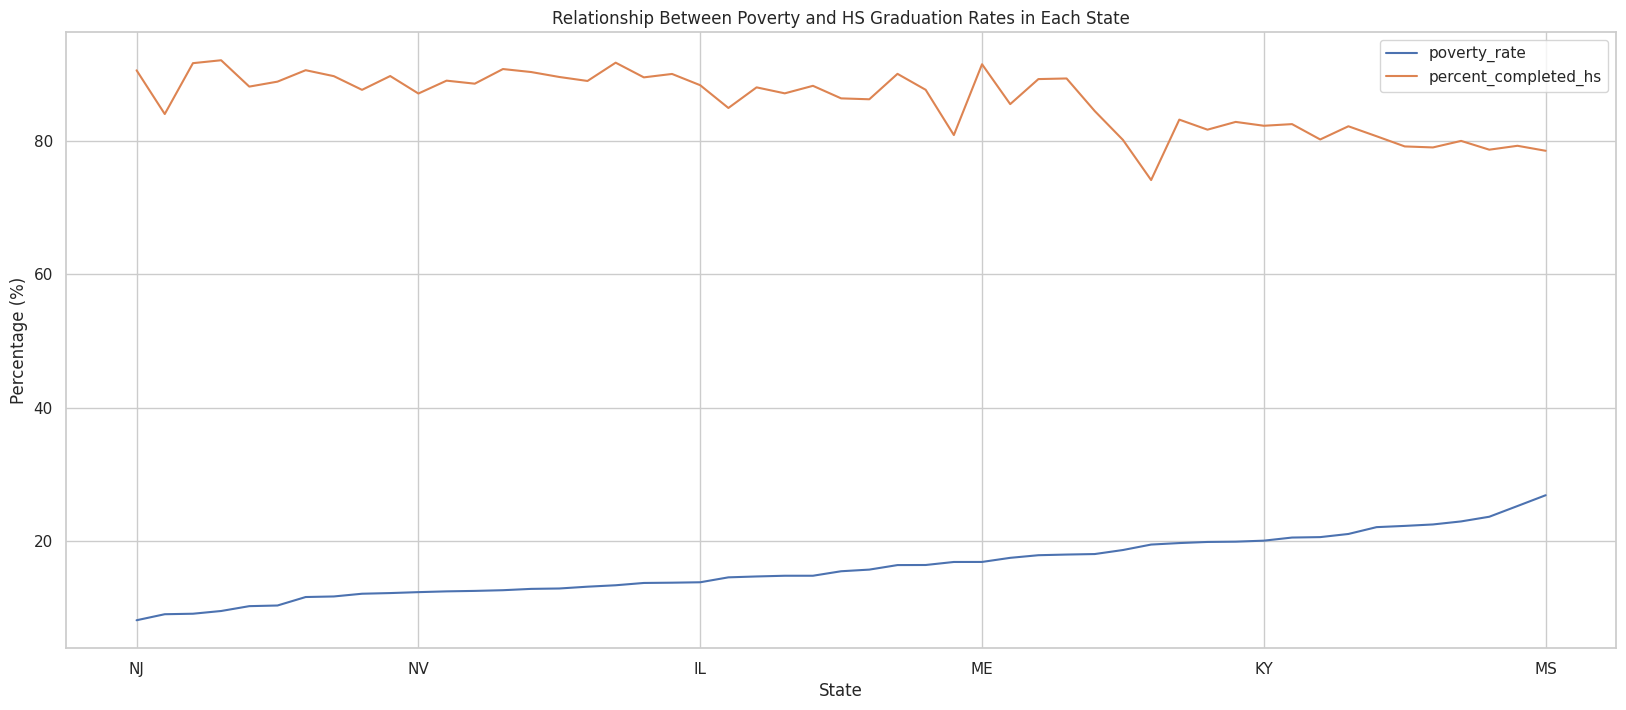

In [ ]:
merged_df.plot(figsize=(20,8),
               title='Relationship Between Poverty and HS Graduation Rates in Each State')

plt.ylabel('Percentage (%)')
plt.xlabel('State')

plt.show()

**In general, the higher the poverty rate in the state, the lower the high school graduation rate. Conversely, the higher the high school graduation rate, the lower the poverty rate.**

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
merged_df

,poverty_rate,percent_completed_hs
Geographic Area,,
NJ,8.16,90.52
WY,9.06,83.97
CT,9.14,91.59
MA,9.55,92.03
MD,10.27,88.08
RI,10.37,88.82
NY,11.64,90.54
UT,11.72,89.64
ND,12.13,87.60


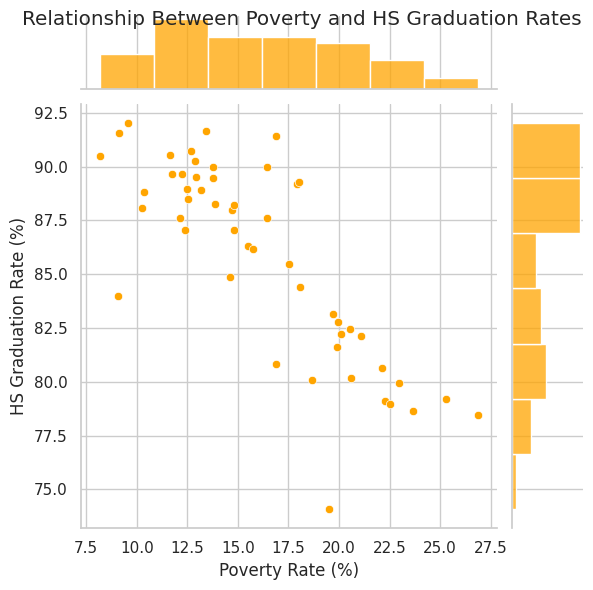

In [ ]:
# Create a Seaborn sns.jointplot() with kind='scatter' and/or kind='kde'
sns.set(style="whitegrid")
inverse = sns.jointplot(data=merged_df,
                  x='poverty_rate',
                  y='percent_completed_hs',
                  kind="scatter",  # interchangeable w kind="kde" for KDEs
                  color='orange')

inverse.set_axis_labels("Poverty Rate (%)", "HS Graduation Rate (%)")
inverse.fig.suptitle("Relationship Between Poverty and HS Graduation Rates")


plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

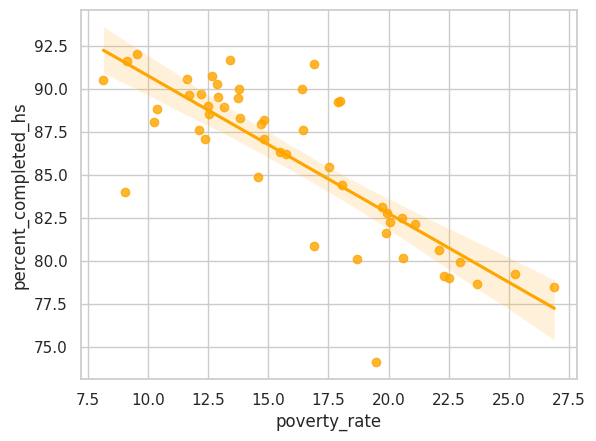

In [ ]:
sns.set(style='whitegrid')
linear_reg_plot = sns.regplot(data=merged_df,
                              x=merged_df.poverty_rate,
                              y=merged_df.percent_completed_hs,
                              color='orange')

# no need to do .show() if not using plt.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_share_race_city['share_white'].replace('(X)', 0, regex=True, inplace=True)
df_share_race_city['share_white'] = df_share_race_city['share_white'].astype(float)

In [ ]:
df_share_race_city['share_black'].replace('(X)', 0, regex=True, inplace=True)
df_share_race_city['share_black'] = df_share_race_city['share_black'].astype(float)

In [ ]:
df_share_race_city['share_native_american'].replace('(X)', 0, regex=True, inplace=True)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].astype(float)

In [ ]:
df_share_race_city['share_asian'].replace('(X)', 0, regex=True, inplace=True)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].astype(float)

In [ ]:
df_share_race_city['share_hispanic'].replace('(X)', 0, regex=True, inplace=True)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].astype(float)

In [ ]:
race_by_state = df_share_race_city.groupby(['Geographic area'])['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'].mean()

<ipython-input-176-1ffcd32aafc8>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
race_by_state

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.26,0.56,45.48,1.38,2.13
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.54,2.68,1.72,5.54,29.51
CO,87.77,0.92,1.62,1.15,17.90
CT,86.11,4.99,0.66,2.99,7.98
DC,38.50,50.70,0.30,3.50,9.10
DE,76.25,15.39,0.52,2.00,7.42


<Axes: title={'center': 'Race Representation in Each State'}, xlabel='Geographic area'>

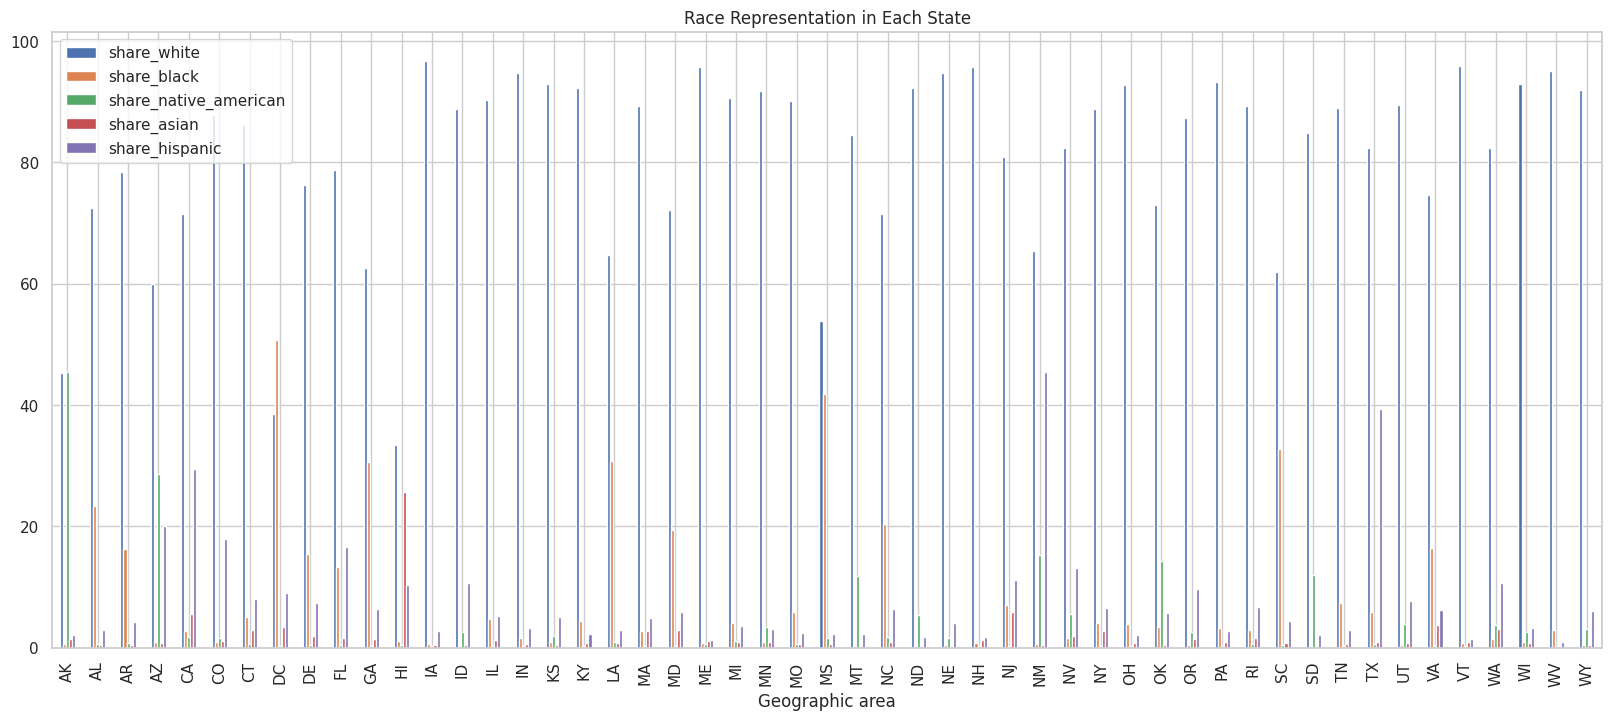

In [ ]:
race_by_state.plot(figsize=(20,8),
                   title='Race Representation in Each State',
                   kind='bar')

In [ ]:
import matplotlib.patches as mpatches

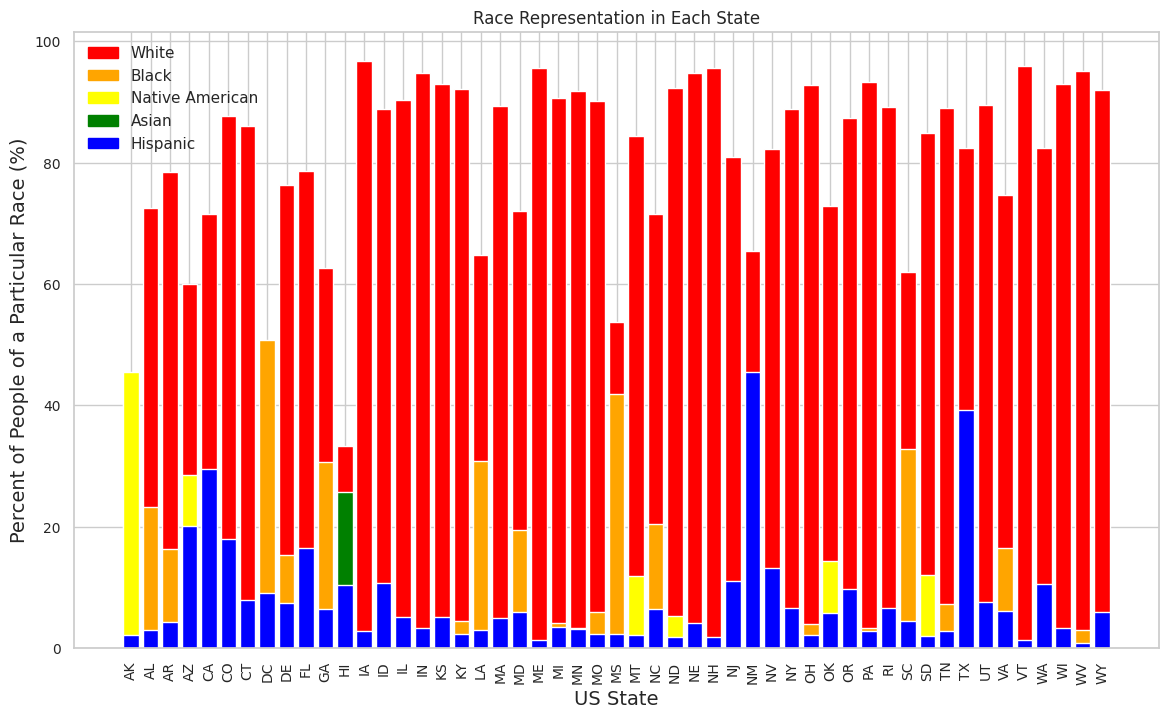

In [ ]:
x_indexes = np.arange(len(race_by_state))

plt.figure(figsize=(14,8))
plt.title('Race Representation in Each State')
plt.ylabel('%', fontsize=14)
plt.xlabel('US State', fontsize=14)

labels = []
for n in range(len(race_by_state)):
    plt.bar(race_by_state.index[n], race_by_state['share_white'][n], color='red')
    plt.bar(race_by_state.index[n], race_by_state['share_black'][n], color='orange')
    plt.bar(race_by_state.index[n], race_by_state['share_native_american'][n], color='yellow')
    plt.bar(race_by_state.index[n], race_by_state['share_asian'][n], color='green')
    plt.bar(race_by_state.index[n], race_by_state['share_hispanic'][n], color='blue')
    labels.append(race_by_state.index[n])

white_legend = mpatches.Patch(label='White', color='red')
black_legend = mpatches.Patch(label='Black', color='orange')
native_american_legend = mpatches.Patch(label='Native American', color='yellow')
asian_legend = mpatches.Patch(label='Asian', color='green')
hispanic_legend = mpatches.Patch(label='Hispanic', color='blue')

plt.legend(handles=[white_legend, black_legend, native_american_legend, asian_legend, hispanic_legend], loc='best', frameon=False)

plt.xticks(ticks=x_indexes, labels=labels, fontsize=10, rotation=90)
plt.ylabel('Percent of People of a Particular Race (%)')
plt.yticks(fontsize=10)

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
race_breakdown_death = df_fatalities['race'].value_counts()

In [ ]:
death_donut = px.pie(race_breakdown_death,
                     names=race_breakdown_death.index,
                     values=race_breakdown_death.values,
                     hole=0.6,
                     title='Fatalities Distribution by Race')
death_donut.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
gender_death_distribution = df_fatalities['gender'].value_counts()

In [ ]:
gender_death_distribution

M    2428
F     107
Name: gender, dtype: int64

Text(0.5, 0, 'Gender')

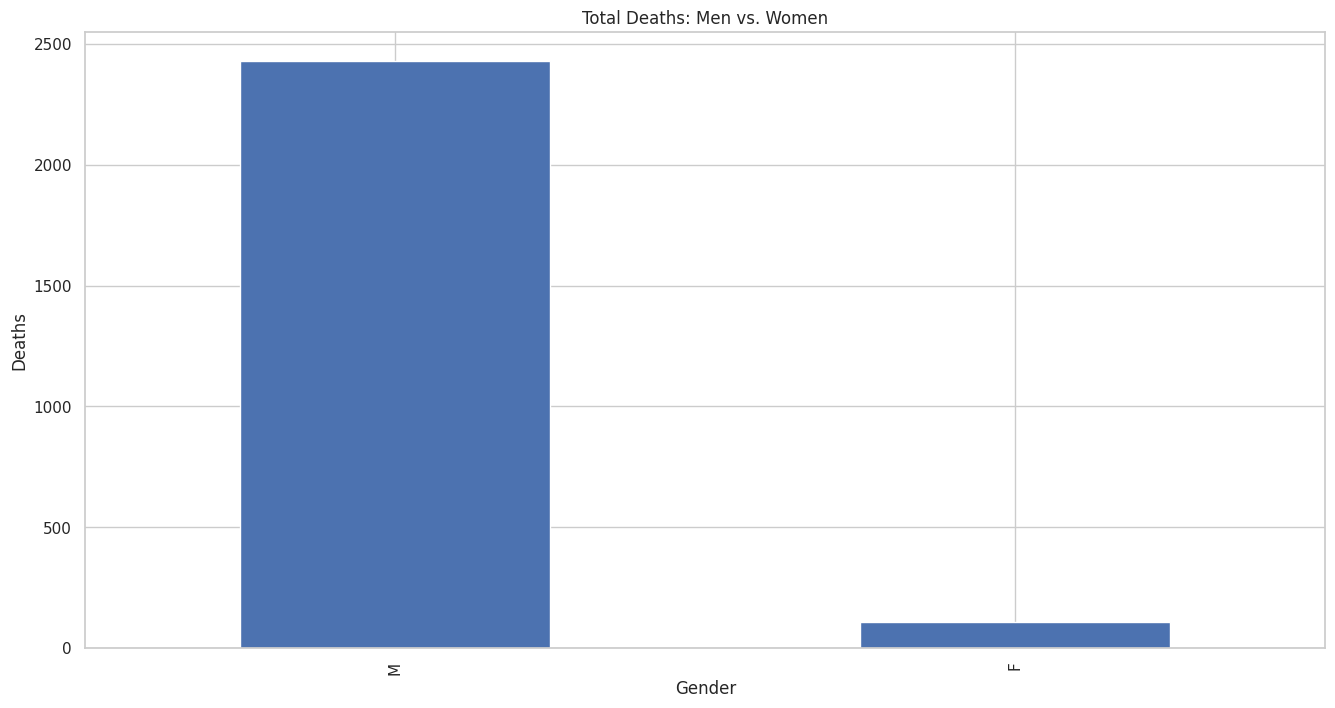

In [ ]:
gender_death_distribution.plot(figsize=(16,8),
                               title='Total Deaths: Men vs. Women',
                               kind='bar')

plt.ylabel('Deaths')
plt.xlabel('Gender')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
death_type_by_gender = df_fatalities[['gender', 'manner_of_death', 'age']]
death_type_by_gender

,gender,manner_of_death,age
0,M,shot,53.00
1,M,shot,47.00
2,M,shot and Tasered,23.00
3,M,shot,32.00
4,M,shot,39.00
...,...,...,...
2530,M,shot,31.00
2531,M,shot,0.00
2532,M,shot,48.00
2533,M,shot,28.00


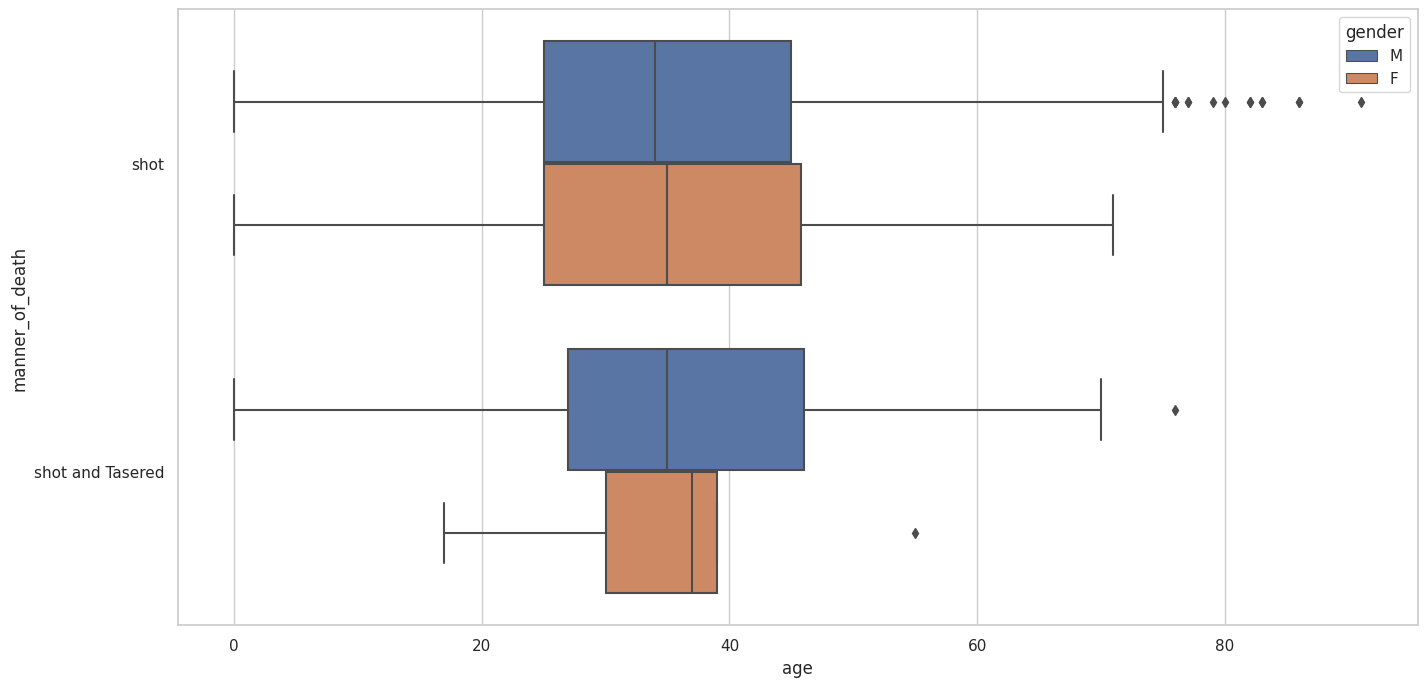

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(death_type_by_gender,
            x='age',
            y='manner_of_death',
            hue='gender')
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_fatalities['armed'].isna().any()

False

In [ ]:
armed_df = df_fatalities['armed'].value_counts()
armed_df

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: armed, Length: 69, dtype: int64

In [ ]:

armed_pie = px.pie(armed_df,
                   names=armed_df.index,
                   values=armed_df.values,
                   color=armed_df.index,
                   title='Percentage of Armed Police Killings')

armed_pie.update_layout(width=2000, height=2000)

armed_pie.show()

**93.25% of police killings were armed and 6.25% of police killings were unarmed.**

**1398 of the police killings were armed with guns and 171 of the police killings were unarmed.**

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
death_age_count = df_fatalities['age'].value_counts()

In [ ]:
death_age_count

25.00    103
36.00     91
31.00     85
24.00     83
29.00     83
        ... 
80.00      1
14.00      1
13.00      1
91.00      1
79.00      1
Name: age, Length: 74, dtype: int64

In [ ]:
total_deaths = df_fatalities['age'].count()
total_deaths

2535

In [ ]:
df_fatalities['age'] = df_fatalities['age'].astype(float)
death_age_under_25 = df_fatalities[df_fatalities['age'] <= 25]
deaths_under_25 = death_age_under_25['age'].count()
deaths_under_25

630

In [ ]:
pct_death_under_25 = deaths_under_25 / total_deaths * 100
pct_death_under_25

24.85207100591716

**24.9% of the people killed were under 25 years old.**

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
death_age_hist = px.histogram(death_age_count,
                         x=death_age_count.index,
                         y=death_age_count.values,
                         title='Distribution of Ages of the People Killed by Police',
                         nbins=92,) # oldest age at death is 91
death_age_hist.update_layout(xaxis_title='Age',
                             yaxis_title='Number of Deaths')

death_age_hist.show()

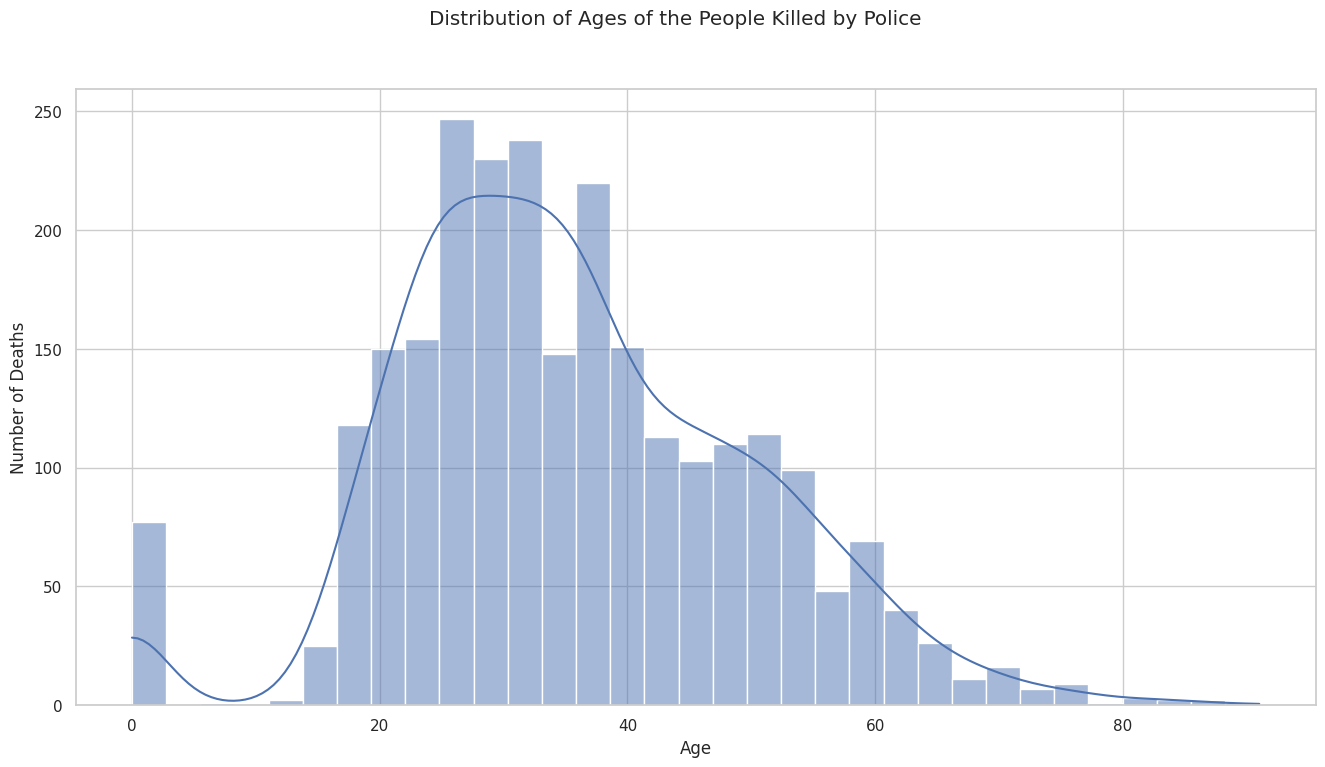

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Distribution of Ages of the People Killed by Police')
sns.histplot(data=df_fatalities,
             x='age',
             kde=True)

plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

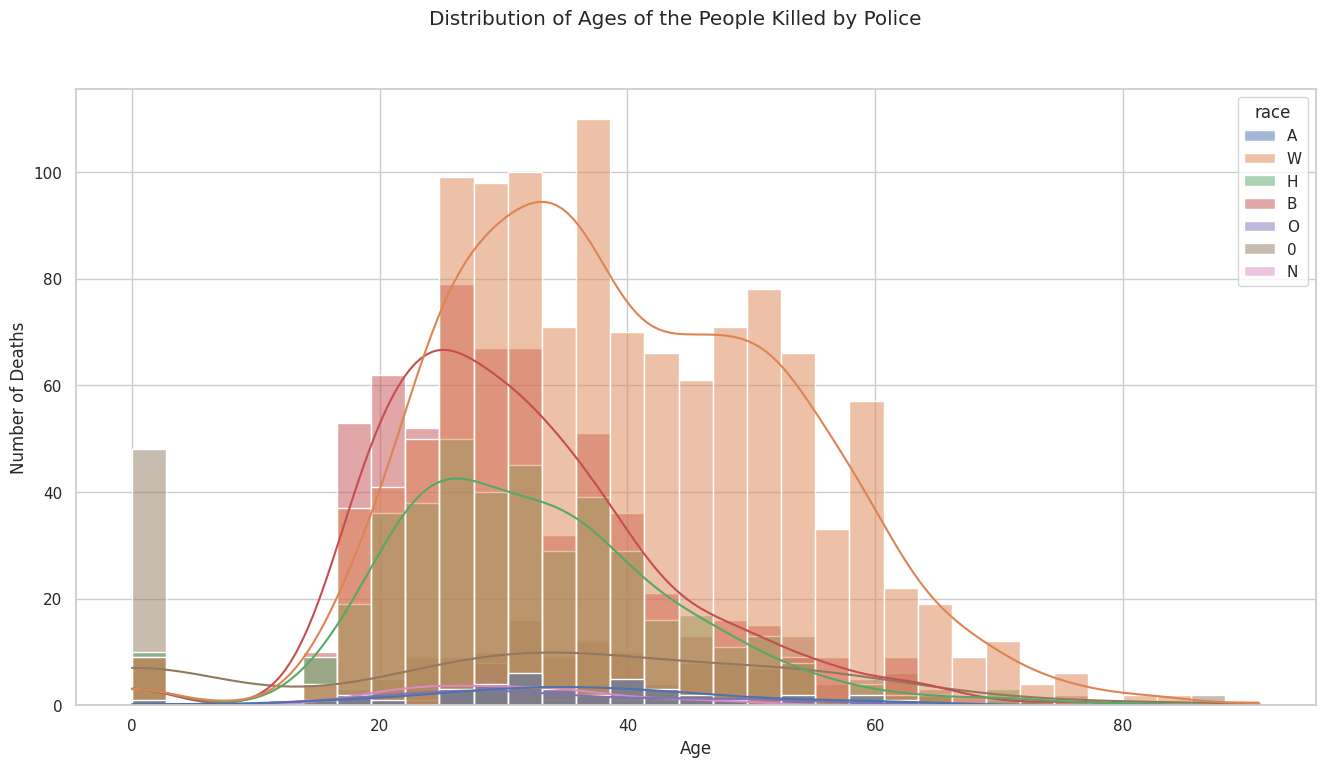

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Distribution of Ages of the People Killed by Police')
sns.histplot(data=df_fatalities,
             x='age',
             hue='race',
             kde=True)

plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
killed_by_race = df_fatalities.groupby(['race'])['id'].count()

In [ ]:
killed_by_race

race
0     195
A      39
B     618
H     423
N      31
O      28
W    1201
Name: id, dtype: int64

In [ ]:
kill_pie = px.pie(killed_by_race,
                  names=killed_by_race.index,
                  values=killed_by_race.values)

kill_pie.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
death_total = df_fatalities['signs_of_mental_illness'].count()
death_total

2535

In [ ]:
df_fatalities['signs_of_mental_illness'].value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [ ]:
pct_of_mentally_ill_killed = 633 / death_total * 100
pct_of_mentally_ill_killed

24.970414201183434

**25% of people killed by the police were diagnosed with a mental illness.**

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top10_cities_police_killings = df_fatalities.groupby(['city'])['name'].count().sort_values(ascending=False)[:10]
top10_cities_police_killings

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Miami          18
Austin         18
St. Louis      15
Name: name, dtype: int64

In [ ]:
top10_bar = px.bar(top10_cities_police_killings,
                   x=top10_cities_police_killings.index,
                   y=top10_cities_police_killings.values,
                   color=top10_cities_police_killings.index,
                   title='Top 10 Cities with the Most Police Killings')

top10_bar.update_layout(xaxis_title='City',
                        yaxis_title='Police Killings')

top10_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
df_fatalities_nonzero = df_fatalities[df_fatalities['race'] != 0] # remove all of the '0' (zero) values for race in the dataframe
df_fatalities_nonzero

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,0.00,M,H,Chowchilla,CA,False,attack,Not fleeing,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
top_10_cities = df_fatalities_nonzero['city'].value_counts().head(10)
top_10_cities

Los Angeles     36
Phoenix         28
Houston         26
Chicago         24
Columbus        18
Austin          18
San Antonio     18
Miami           17
Las Vegas       17
Indianapolis    14
Name: city, dtype: int64

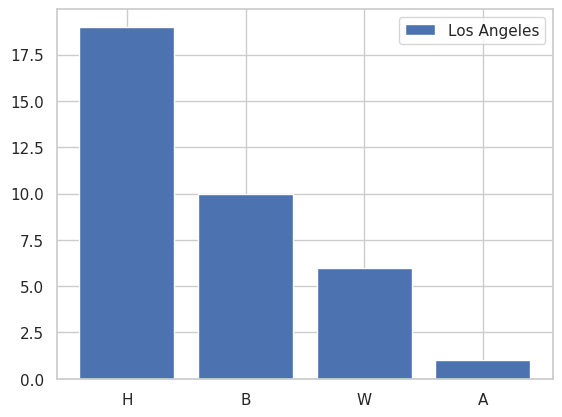

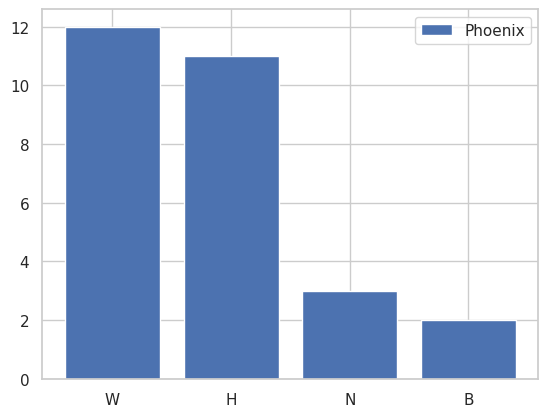

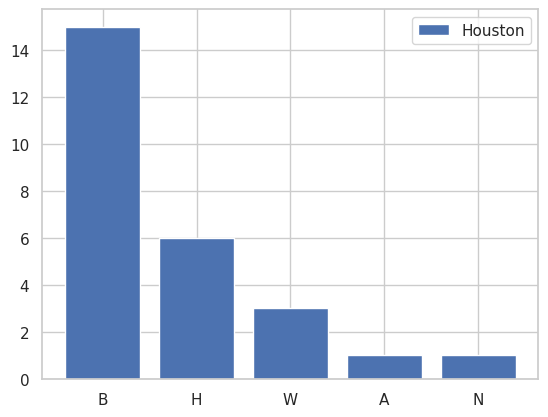

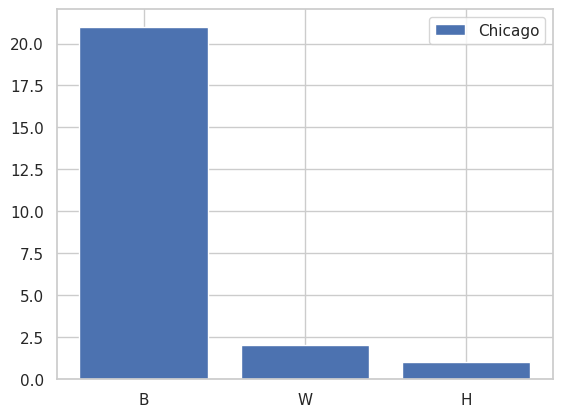

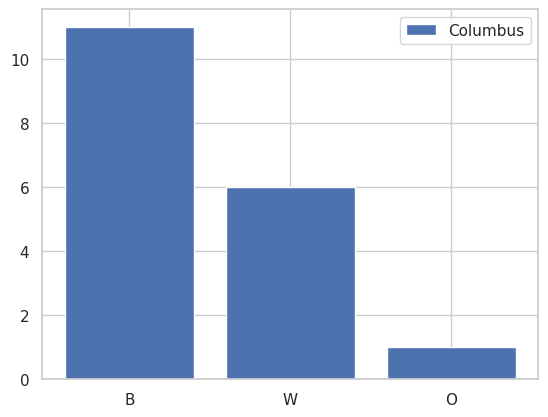

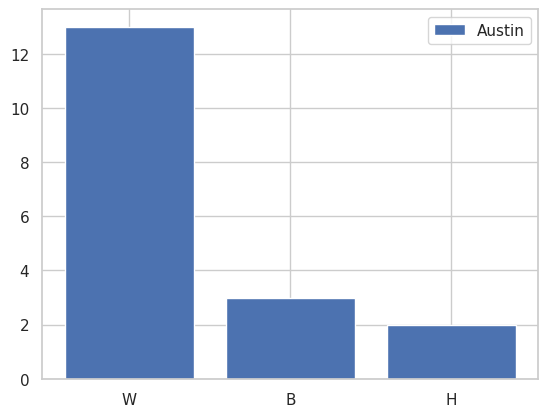

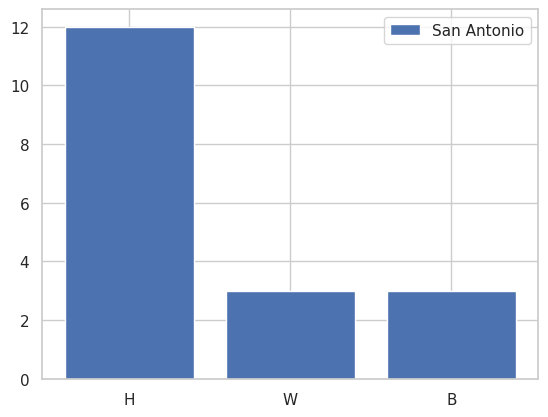

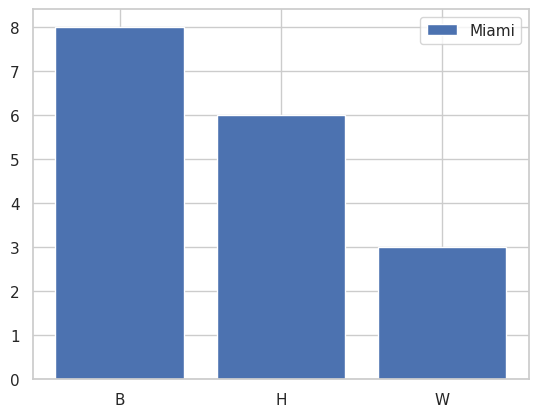

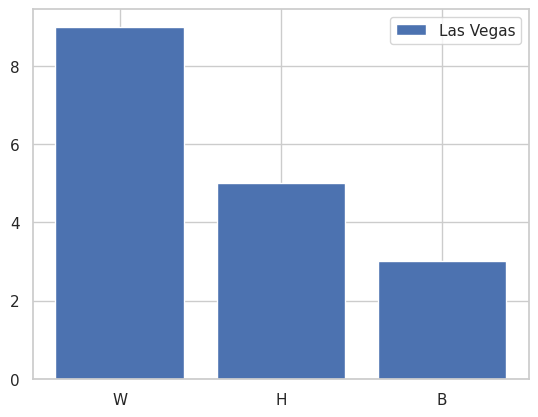

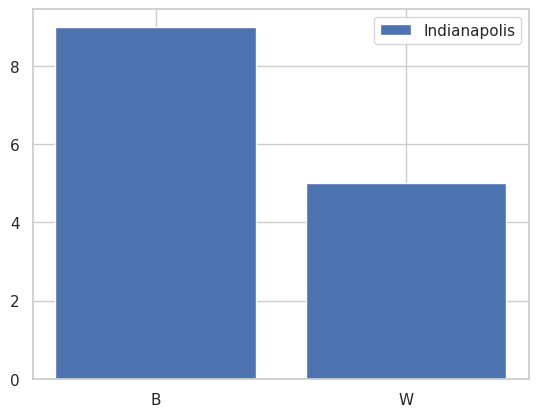

In [ ]:
race_breakdown = df_fatalities_nonzero[['city', 'race']]
for town in top_10_cities.index:
    top_cities = race_breakdown.loc[race_breakdown['city'] == town]
    city = top_cities.race.value_counts()
    plt.bar(city.index, city, label=town)
    plt.legend(loc='best')
    plt.show()


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
danger_map_states = df_fatalities.groupby(['state']).size().sort_values()

In [ ]:
danger_map_states

state
RI      2
VT      3
ND      4
NH      7
WY      8
DE      8
CT      9
SD     10
DC     11
MT     11
HI     11
IA     12
ME     13
NE     15
AK     15
ID     17
MA     22
MS     23
UT     23
KS     24
AR     26
WV     27
MN     32
NJ     35
MI     37
MD     38
OR     38
NV     42
WI     43
IN     43
KY     43
SC     44
NY     45
VA     47
AL     50
PA     51
NM     51
LA     57
TN     59
IL     62
WA     62
MO     64
NC     69
GA     70
CO     74
OK     78
OH     79
AZ    118
FL    154
TX    225
CA    424
dtype: int64

In [ ]:
danger_map = px.choropleth(danger_map_states,
                           locations=danger_map_states.index,
                           locationmode='USA-states',
                           color=danger_map_states,
                           title='Number of Deaths by State',
                           color_continuous_scale=px.colors.sequential.matter)

danger_map.update_layout(coloraxis_showscale=True)

danger_map.show()

**This choropleth is consistent with the charts in the previous exercise. The states with the darker hues have the cities in the top 10 most dangerous cities list.**

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities_month_year = df_fatalities.copy()

In [ ]:
df_fatalities_month_year.date = pd.to_datetime(df_fatalities_month_year.date, infer_datetime_format=True).dt.to_period('m')

In [ ]:
df_fatalities_month_year.date = df_fatalities_month_year.date.astype(str)

In [ ]:
timeline = df_fatalities_month_year.groupby('date').size()
timeline

date
2015-01    70
2015-02    78
2015-03    87
2015-04    88
2015-05    85
2015-06    68
2015-07    85
2015-08    86
2015-09    90
2015-10    89
2015-11    80
2015-12    85
2016-01    85
2016-02    79
2016-03    89
2016-04    75
2016-05    82
2016-06    90
2016-07    78
2016-08    79
2016-09    71
2016-10    77
2016-11    84
2016-12    74
2017-01    75
2017-02    69
2017-03    74
2017-04    70
2017-05    61
2017-06    63
2017-07    71
2017-08    18
2017-09    23
2017-10    21
2017-11    16
2017-12    20
dtype: int64

Text(0, 0.5, 'Deaths')

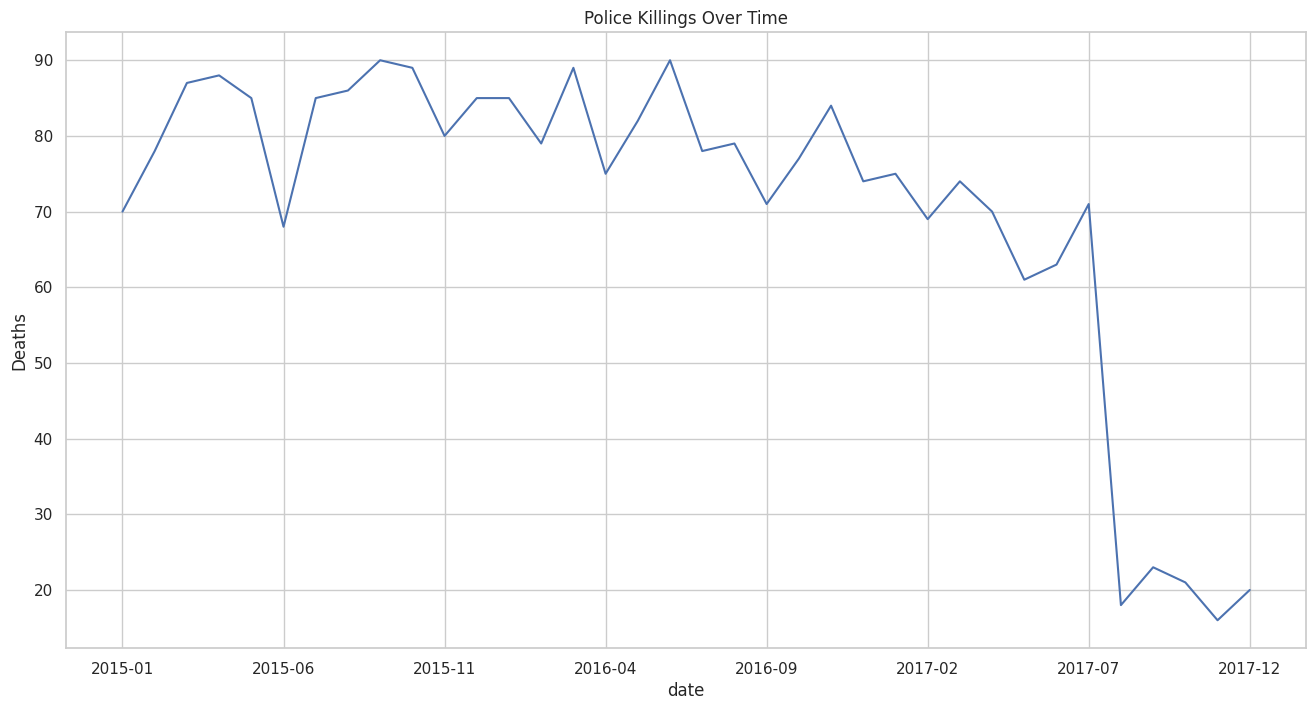

In [ ]:
timeline.plot(figsize=(16,8),
              title='Police Killings Over Time')
plt.ylabel('Deaths')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).